# Linear Regression for House Price Predection

## 0. Import libraries
Here we import the libraries which we want to use in this notebook.

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## 1. Data exploration
For each ML task, it is an essential step to explore the data which want to analyze. The more we get to know the data, the better models we can find to solve the problem. This step is also called *EDA* in data science.

In [3]:
# load the dataset
ds = load_boston()

# All of the built-in datasets in sklearn library are made of a python dictionary.
# In order to see what parts it has, we use the command below:
ds.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
# See the shape of the dataset and the target vector:

print ("DATA SHAPE: {}".format(ds.data.shape))
print ("TARGET SHAPE: {}".format(ds.target.shape))

DATA SHAPE: (506, 13)
TARGET SHAPE: (506,)


In [5]:
# So we have 13 features. To see the features list we can run this:
ds.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
# And for the description of the features:
print(ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
# In ML tasks, usually the data set is integerated in a Pandas dataframe. It's easier to use and extract statiscial features.
df = pd.DataFrame(ds.data, columns=ds.feature_names)

# add the target of the dataset to dataframe as a column
df['TARGET'] = ds.target

print("# OF TOTAL EXAMPLES: {}".format(len(df)))
df.head(10)

# OF TOTAL EXAMPLES: 506


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


To see some of the most common statistical features of the dataset for, we can run `df.describe()`.
But in order to have a more visualized with plots and more description, we can take advantage of the Pandas Profiler. It creates an HTML file including these information.

In [9]:
profile = ProfileReport(df)

# Save the report as a HTML file
profile.to_file('boston.html')

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 2. Prepare data

In [10]:
# shuffle the dataset rows
df = df.sample(frac=1)

# split the data into test and train sets
train_samples, test_samples = train_test_split(df, test_size=0.2)
print("TRAIN SHAPE: {}".format(train_samples.shape))
print("TEST SHAPE: {}".format(test_samples.shape))

TRAIN SHAPE: (404, 14)
TEST SHAPE: (102, 14)


In [11]:
X_train = train_samples.LSTAT.values.reshape(-1, 1)
y_train = train_samples.TARGET.values.reshape(-1, 1)

X_test = test_samples.LSTAT.values.reshape(-1, 1)
y_test = test_samples.TARGET.values.reshape(-1, 1)

## 3. Model
Fortunately, Sklearn has provided around all the ML algorithms for us and its not needed to be implemented from zero.

In [12]:
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

LinearRegression()

Let's see the coefficients of the line which is fitted to the samples

In [13]:
print(lr.coef_, lr.intercept_)

[[-0.92973629]] [34.01467737]


## Predict

In [14]:
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

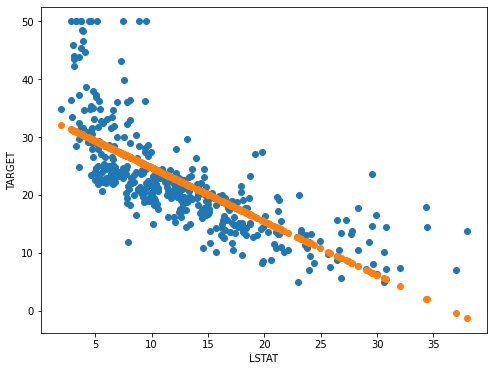

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('LSTAT')
ax.set_ylabel('TARGET')

ax.scatter(X_train, y_train)
ax.scatter(X_train, y_hat_train)

In [16]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('TRAIN MSE LOSS: {}'.format(mse_train))
print('TEST MSE LOSS: {}'.format(mse_test))

TRAIN MSE LOSS: 37.93200782851979
TEST MSE LOSS: 41.16427075152439
